## Assignment: Advanced Regression
### Client - Surprise Housing ( A US-based housing company)

#### Business Objective -
 - Company is looking at prospective properties to buy to enter the Australian Housing Market.
 - They want to buy properties at a lower price and sell them at higher price
 - They want to know Which variables are significant in predicting the price of a house
 - How well those variables describe the price of a house.

#### Business Goal - 

 - A Regression Pricing Model to be devleoped using Regularization 
 - This model will then be used by the management to understand how exactly the prices vary with the variables. 
 - They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
 - Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

 

### Import modules 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np

pd.set_option('display.max_columns', None)

## Data Loading

In [2]:
# reading the dataset
train = pd.read_csv("train.csv")

## Data Understanding, Preparation and EDA

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Describing Categorical value
print(train.describe(include = [np.object]))

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylS

In [6]:
#Describing Numeric Value
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Visualization of Categorical variables

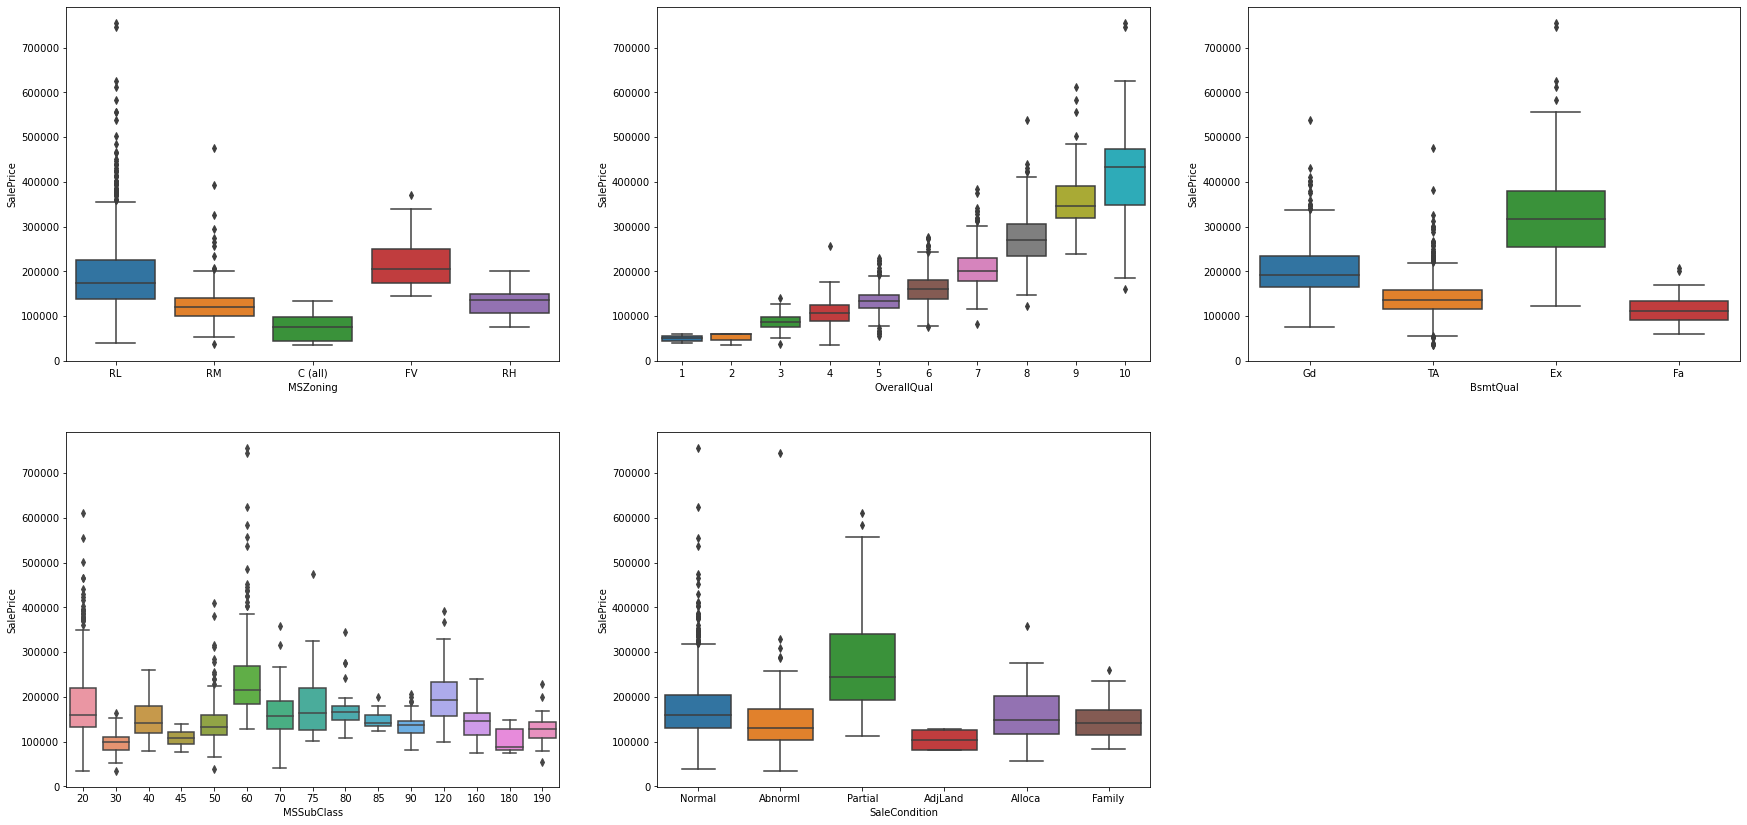

In [7]:
plt.figure(figsize=(30, 30))  
plt.subplot(4,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = train)

plt.subplot(4,3,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train)


plt.subplot(4,3,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = train)

plt.subplot(4,3,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train)


plt.subplot(4,3,5)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train)

### Visualization of Numeric values

#### Let's now spend some time doing what is arguably the most important step - understanding the data.

- Understanding the distribution of various numeric variables
- Detect the outliers through boxplot
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
- We'll visualise our data using matplotlib and seaborn.

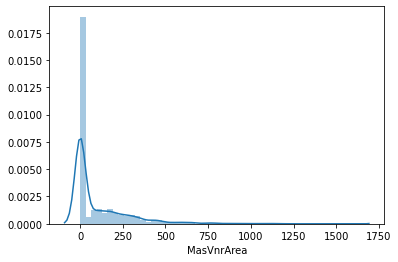

In [8]:
# Plot SalePrice
sns.distplot(train['MasVnrArea'])
plt.show()


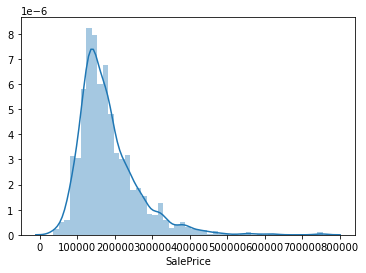

In [9]:

# Plot SalePrice
sns.distplot(train['SalePrice'])
plt.show()


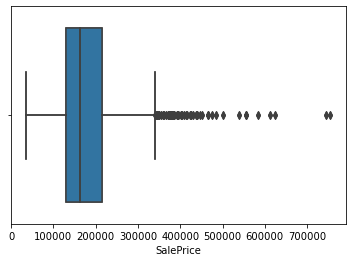

In [10]:
import seaborn as sns
sns.boxplot(x=train['SalePrice'])

sns.boxplot(x=train['SalePrice'])

## Handling Outlier 

In [11]:
# Treatment of outliers - function to calculate interquartile range
from numpy.random import randn
from numpy import percentile

def outlier_treatment(datacolumn):
    
    q25, q75, q50 = percentile(datacolumn, 25), percentile(datacolumn, 75), percentile(datacolumn, 50)
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    return iqr, lower, upper, q25, q75, q50

    



In [12]:
#Treat LotArea for outliers - SalePrice
iqr, lower, upper, q25, q75, q50 = outlier_treatment(train["SalePrice"])

print(iqr)
print(lower)
print(upper)

Upper_outliers =train.loc[train['SalePrice'] > upper]
Lower_outliers =train.loc[train['SalePrice'] < lower]
print(" Number of rows present above upper cutoff : ", Upper_outliers.shape)
print(" Number of rows present above upper cutoff : ",Lower_outliers.shape)
print('Percentiles: 25th=%.3f, 75th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q75, q50, iqr))


84025.0
3937.5
340037.5
 Number of rows present above upper cutoff :  (61, 81)
 Number of rows present above upper cutoff :  (0, 81)
Percentiles: 25th=129975.000, 75th=214000.000, 50th=163000.000, IQR=84025.000


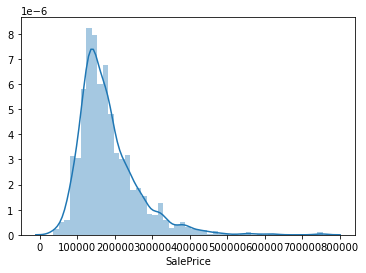

In [13]:
# Plot SalePrice before log transformation
sns.distplot(train['SalePrice'])
plt.show()

In [14]:
train["SalePrice"] = train["SalePrice"].map(lambda i: np.log(i) if i > 0 else 0)

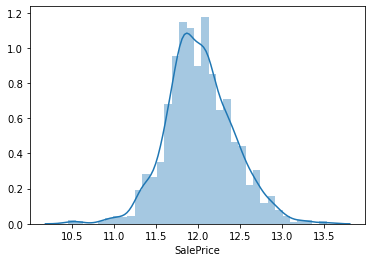

In [15]:
# Plot SalePrice after log transformation
sns.distplot(train['SalePrice'])
plt.show()

In [16]:
#Treat LotArea for outliers
iqr, lower, upper, q25, q75, q50 = outlier_treatment(train["LotArea"])

print(iqr)
print(lower)
print(upper)

Upper_outliers =train.loc[train['LotArea'] > upper]
Lower_outliers =train.loc[train['LotArea'] < lower]
print(" Number of rows present above upper cutoff : ", Upper_outliers.shape)
print(" Number of rows present lower lower cutoff : ",Lower_outliers.shape)
print('Percentiles: 25th=%.3f, 75th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q75, q50, iqr))

4048.0
1481.5
17673.5
 Number of rows present above upper cutoff :  (67, 81)
 Number of rows present lower lower cutoff :  (2, 81)
Percentiles: 25th=7553.500, 75th=11601.500, 50th=9478.500, IQR=4048.000


In [17]:
#Replace with median value
train['LotArea'] = np.where(train['LotArea'] > upper, q50, train['LotArea']  )

In [18]:
# calculate interquartile range - BsmtUnfSF
iqr, lower, upper, q25, q75, q50 = outlier_treatment(train["BsmtUnfSF"])

print(iqr)
print(lower)
print(upper)

Upper_outliers =train.loc[train['BsmtUnfSF'] > upper]
Lower_outliers =train.loc[train['BsmtUnfSF'] < lower]
print(" Number of rows present above upper cutoff : ", Upper_outliers.shape)
print(" Number of rows present above lower cutoff : ",Lower_outliers.shape)
print('Percentiles: 25th=%.3f, 75th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q75, q50, iqr))

585.0
-654.5
1685.5
 Number of rows present above upper cutoff :  (29, 81)
 Number of rows present above lower cutoff :  (0, 81)
Percentiles: 25th=223.000, 75th=808.000, 50th=477.500, IQR=585.000


In [19]:
#Replace with median value
train['BsmtUnfSF'] = np.where(train['BsmtUnfSF'] > upper, q50, train['BsmtUnfSF']  )

In [20]:
# calculate interquartile range - 2ndFlrSF
iqr, lower, upper, q25, q75, q50 = outlier_treatment(train["2ndFlrSF"])

print(iqr)
print(lower)
print(upper)

Upper_outliers =train.loc[train['2ndFlrSF'] > upper]
Lower_outliers =train.loc[train['2ndFlrSF'] < lower]
print(" Number of rows present above upper cutoff : ", Upper_outliers.shape)
print(" Number of rows present above upper cutoff : ",Lower_outliers.shape)
print('Percentiles: 25th=%.3f, 75th=%.3f, 50th=%.3f, IQR=%.3f' % (q25, q75,q50, iqr))

728.0
-1092.0
1820.0
 Number of rows present above upper cutoff :  (2, 81)
 Number of rows present above upper cutoff :  (0, 81)
Percentiles: 25th=0.000, 75th=728.000, 50th=0.000, IQR=728.000


In [21]:
#Replace with median value
train['2ndFlrSF'] = np.where(train['2ndFlrSF'] > upper, q50, train['2ndFlrSF']  )

In [22]:
#Describing Numeric Value
train["SalePrice"].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

### Data Preparation - convert Numeric to Categorical type

In [23]:
#Changing the numeric to categorical 

train['MSSubClass'] = train['MSSubClass'].astype('object')
train['OverallQual'] = train['OverallQual'].astype('object')
train['OverallCond'] = train['OverallCond'].astype('object')


## Data Cleanup

### Handling missing values

In [24]:
# DATA CLEANUP - Check missing values in fund amount -???? # - check % of missing value to decide
pd.set_option('display.max_columns', None)

print("----------------------------------------------------\n")
print("Missing Values in the dataframe: \n", train.isnull().sum())

----------------------------------------------------

Missing Values in the dataframe: 
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


##### Find out the missing columns on the basis of percentage missing values

In [25]:
# percentage of missing values in each column
round(train.isnull().sum()/len(train.index), 2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
                 ... 
MoSold            0.0
YrSold            0.0
SaleType          0.0
SaleCondition     0.0
SalePrice         0.0
Length: 81, dtype: float64

### Find out columns with > 80% missing values and drop them

In [26]:
# The above is showing the entire list, hence lets break down - displaying the columns having more than 90% missing values
missing_columns = train.columns[100*(train.isnull().sum()/len(train.index)) > 80]
print(missing_columns)

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


###  Let's drop the columns with missing values > 80%  -> 'Alley', 'PoolQC', 'MiscFeature', 'Fence'

In [27]:
train.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature'], axis =1, inplace = True)

### Displaying the columns having at least one missing value. 

ie. all the columns with atleast one NaN value or more need to be handled.

#### Approach - Devide them into Numeric columns with Nan values & Categorical columns with Nan values

In [28]:
# displaying the columns having more than 0% missing values ie all the columns with atleast one NaN value
missing_columns_1 = train.columns[100*(train.isnull().sum()/len(train.index)) > 0 ]
print(missing_columns_1)

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'Fence'],
      dtype='object')


### Handling NaN of Numeric variables

In [29]:
train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [30]:

    
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
#train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train["YrSold"])



### Derive the Age of the House

In [31]:
#Derive the age of the house & garag
train["HouseAge"] = train["YrSold"] - train["YearBuilt"]

In [32]:
train["Remodel"] = train.apply(lambda x: 0 if (x['YearRemodAdd'] - x['YearBuilt']   == 0 ) else 1, axis=1)

In [33]:
train["GaragAge"] = train["YrSold"] - train["GarageYrBlt"]

In [34]:
#drop the year variables
train.drop(["YrSold", "YearBuilt", "YearRemodAdd", "GarageYrBlt"], axis =1 , inplace = True)

In [35]:
train .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### Find out categorical columns with missing values

#### How to handle the categorical missing values -> 
Except electrical all the categorical variable with missing values have the "NA" options. So filling the null value with "None" for these variables including electrical. 

In [36]:
#Fill NaN with "None" in  categorical columns with missing values 

train["MasVnrType"].fillna("None", inplace = True)
train["BsmtQual"].fillna("None", inplace = True)
train["BsmtCond"].fillna("None", inplace = True)
train["BsmtExposure"].fillna("None", inplace = True)
train["BsmtFinType1"].fillna("None", inplace = True)
train["BsmtFinType2"].fillna("None", inplace = True)
train["Electrical"].fillna("None", inplace = True)
train["FireplaceQu"].fillna("None", inplace = True)
train["GarageType"].fillna("None", inplace = True)
train["GarageFinish"].fillna("None", inplace = True)
train["GarageQual"].fillna("None", inplace = True)
train["GarageCond"].fillna("None", inplace = True)
train["Fence"].fillna("None", inplace = True)


#### Reduce the number of categories into smaller number of groups by filling the default as "Other" if the count is less than the threshold . 

##### This will help to reduce the number of dummy variables which have less number of data and hence weak predictors. 

In [37]:
print(train["GarageQual"].value_counts())
train["GarageQual"] = np.where(train.groupby('GarageQual')['GarageQual'].transform('size') <=100 , 'Other', train['GarageQual'])
print(train["GarageQual"].value_counts())

TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
Name: GarageQual, dtype: int64
TA       1311
Other     149
Name: GarageQual, dtype: int64


In [38]:
print(train["GarageCond"].value_counts())

train["GarageCond"] = np.where(train.groupby('GarageCond')['GarageCond'].transform('size') <=100 , 'Other', train['GarageCond'])

print(train["GarageCond"].value_counts())

TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: GarageCond, dtype: int64
TA       1326
Other     134
Name: GarageCond, dtype: int64


In [39]:
print(train["GarageType"].value_counts())

train["GarageType"] = np.where(train.groupby('GarageType')['GarageType'].transform('size') <=50 , 'Other', train['GarageType'])

print(train["GarageType"].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
None        81
Other       34
Name: GarageType, dtype: int64


In [40]:
print(train["MSZoning"].value_counts())

train["MSZoning"] = np.where(train.groupby('MSZoning')['MSZoning'].transform('size') <=100 , 'Other', train['MSZoning'])

print(train["MSZoning"].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
RL       1151
RM        218
Other      91
Name: MSZoning, dtype: int64


In [41]:
print(train["Neighborhood"].value_counts())

train["Neighborhood"] = np.where(train.groupby('Neighborhood')['Neighborhood'].transform('size') <=50 , 'Other', train['Neighborhood'])

print(train["Neighborhood"].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Other      315
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Name: Neighborhood, dtype: int64


In [42]:
print(train["MSSubClass"].value_counts())

train["MSSubClass"] = np.where(train.groupby('MSSubClass')['MSSubClass'].transform('size') <=50 , 'Other', train['MSSubClass'])

print(train["MSSubClass"].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
20       536
60       299
50       144
Other     92
120       87
30        69
160       63
70        60
80        58
90        52
Name: MSSubClass, dtype: int64


In [43]:
print(train["LotConfig"].value_counts())

train["LotConfig"] = np.where(train.groupby('LotConfig')['LotConfig'].transform('size') <=50 , 'FR', train['LotConfig'])

print(train["LotConfig"].value_counts())

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR           51
Name: LotConfig, dtype: int64


In [44]:
print(train["Condition1"].value_counts())
train["Condition1"] = np.where(train.groupby('Condition1')['Condition1'].transform('size') <=50 , 'Other', train['Condition1'])

print(train["Condition1"].value_counts())


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm     1260
Other     119
Feedr      81
Name: Condition1, dtype: int64


In [45]:
print(train["Condition2"].value_counts())
train["Condition2"] = np.where(train.groupby('Condition2')['Condition2'].transform('size') <=50 , 'Other', train['Condition2'])

print(train["Condition2"].value_counts())

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Norm     1445
Other      15
Name: Condition2, dtype: int64


In [46]:
print(train["BldgType"].value_counts())
train["BldgType"] = np.where(train.groupby('BldgType')['BldgType'].transform('size') <=50 , 'Other', train['BldgType'])

print(train["BldgType"].value_counts())

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
1Fam      1220
TwnhsE     114
Other       74
Duplex      52
Name: BldgType, dtype: int64


In [47]:
print(train["HouseStyle"].value_counts())
train["HouseStyle"] = np.where(train.groupby('HouseStyle')['HouseStyle'].transform('size') <=50 , 'Other', train['HouseStyle'])

print(train["HouseStyle"].value_counts())

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    726
2Story    445
1.5Fin    154
Other      70
SLvl       65
Name: HouseStyle, dtype: int64


In [48]:
print(train["RoofStyle"].value_counts())
train["RoofStyle"] = np.where(train.groupby('RoofStyle')['RoofStyle'].transform('size') <=50 , 'Other', train['RoofStyle'])

print(train["RoofStyle"].value_counts())

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Gable    1141
Hip       286
Other      33
Name: RoofStyle, dtype: int64


In [49]:
print(train["RoofMatl"].value_counts())
train["RoofMatl"] = np.where(train.groupby('RoofMatl')['RoofMatl'].transform('size') <=50 , 'Other', train['RoofMatl'])

print(train["RoofMatl"].value_counts())

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64
CompShg    1434
Other        26
Name: RoofMatl, dtype: int64


In [50]:
print(train["Exterior1st"].value_counts())
train["Exterior1st"] = np.where(train.groupby('Exterior1st')['Exterior1st'].transform('size') <=100 , 'Other', train['Exterior1st'])

print(train["Exterior1st"].value_counts())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Other      189
Plywood    108
Name: Exterior1st, dtype: int64


In [51]:
print(train["Exterior2nd"].value_counts())
train["Exterior2nd"] = np.where(train.groupby('Exterior2nd')['Exterior2nd'].transform('size') <=100 , 'Other', train['Exterior2nd'])

print(train["Exterior2nd"].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      196
Plywood    142
Name: Exterior2nd, dtype: int64


In [52]:
print(train["Exterior2nd"].value_counts())
train["Exterior2nd"] = np.where(train.groupby('Exterior2nd')['Exterior2nd'].transform('size') <=100 , 'Other', train['Exterior2nd'])

print(train["Exterior2nd"].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      196
Plywood    142
Name: Exterior2nd, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Other      196
Plywood    142
Name: Exterior2nd, dtype: int64


In [53]:
print(train["MasVnrType"].value_counts())

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [54]:
print(train["ExterQual"].value_counts())
train["ExterQual"] = np.where(train.groupby('ExterQual')['ExterQual'].transform('size') <=100 , 'EXFA', train['ExterQual'])

print(train["ExterQual"].value_counts())

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA      906
Gd      488
EXFA     66
Name: ExterQual, dtype: int64


In [55]:
print(train["ExterCond"].value_counts())
train["ExterCond"] = np.where(train.groupby('ExterCond')['ExterCond'].transform('size') <=100 , 'FAEXPO', train['ExterCond'])

print(train["ExterCond"].value_counts())

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA        1282
Gd         146
FAEXPO      32
Name: ExterCond, dtype: int64


In [56]:
print(train["Foundation"].value_counts())
train["Foundation"] = np.where(train.groupby('Foundation')['Foundation'].transform('size') <=200 , 'BrkTilOthr', train['Foundation'])

print(train["Foundation"].value_counts())

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
PConc         647
CBlock        634
BrkTilOthr    179
Name: Foundation, dtype: int64


In [57]:
print(train["BsmtCond"].value_counts())

train["BsmtCond"] = np.where(train.groupby('BsmtCond')['BsmtCond'].transform('size') <=50 , 'FAPO', train['BsmtCond'])

print(train["BsmtCond"].value_counts())

TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64
TA      1311
FAPO      84
Gd        65
Name: BsmtCond, dtype: int64


In [58]:
print(train["BsmtExposure"].value_counts())


No      953
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64


In [59]:
print(train["BsmtFinType1"].value_counts())


Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64


In [60]:
print(train["BsmtFinType2"].value_counts())
train["BsmtFinType2"] = np.where(train.groupby('BsmtFinType2')['BsmtFinType2'].transform('size') <=100 , 'Finished', train['BsmtFinType2'])

print(train["BsmtFinType2"].value_counts())

Unf     1256
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64
Unf         1256
Finished     204
Name: BsmtFinType2, dtype: int64


In [61]:
print(train["Heating"].value_counts())
train["Heating"] = np.where(train.groupby('Heating')['Heating'].transform('size') <=100 , 'Other', train['Heating'])

print(train["Heating"].value_counts())

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
GasA     1428
Other      32
Name: Heating, dtype: int64


In [62]:
print(train["Electrical"].value_counts())
train["Electrical"] = np.where(train.groupby('Electrical')['Electrical'].transform('size') <=100 , 'Other', train['Electrical'])

print(train["Electrical"].value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
None        1
Name: Electrical, dtype: int64
SBrkr    1334
Other     126
Name: Electrical, dtype: int64


In [63]:
print(train["KitchenQual"].value_counts())
train["KitchenQual"] = np.where(train.groupby('KitchenQual')['KitchenQual'].transform('size') <=100 , 'EX', train['KitchenQual'])

print(train["KitchenQual"].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
TA    735
Gd    586
EX    139
Name: KitchenQual, dtype: int64


In [64]:
print(train["Functional"].value_counts())
train["Functional"] = np.where(train.groupby('Functional')['Functional'].transform('size') <=100 , 'Other', train['Functional'])

print(train["Functional"].value_counts())

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Typ      1360
Other     100
Name: Functional, dtype: int64


In [65]:
print(train["FireplaceQu"].value_counts())
train["FireplaceQu"] = np.where(train.groupby('FireplaceQu')['FireplaceQu'].transform('size') <=100 , 'Other', train['FireplaceQu'])

print(train["FireplaceQu"].value_counts())

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64
None     690
Gd       380
TA       313
Other     77
Name: FireplaceQu, dtype: int64


In [66]:
print(train["GarageType"].value_counts())
train["GarageType"] = np.where(train.groupby('GarageType')['GarageType'].transform('size') <=50 , 'Other', train['GarageType'])

print(train["GarageType"].value_counts())

Attchd     870
Detchd     387
BuiltIn     88
None        81
Other       34
Name: GarageType, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
None        81
Other       34
Name: GarageType, dtype: int64


In [67]:
print(train["GarageFinish"].value_counts())


Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64


In [68]:
print(train["GarageQual"].value_counts())
train["GarageQual"] = np.where(train.groupby('GarageQual')['GarageQual'].transform('size') <=100 , 'NONTA', train['GarageQual'])

print(train["GarageQual"].value_counts())

TA       1311
Other     149
Name: GarageQual, dtype: int64
TA       1311
Other     149
Name: GarageQual, dtype: int64


In [69]:
print(train["GarageCond"].value_counts())
train["GarageCond"] = np.where(train.groupby('GarageCond')['GarageCond'].transform('size') <=100 , 'NONTA', train['GarageCond'])

print(train["GarageCond"].value_counts())

TA       1326
Other     134
Name: GarageCond, dtype: int64
TA       1326
Other     134
Name: GarageCond, dtype: int64


In [70]:
print(train["PavedDrive"].value_counts())


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


In [71]:
print(train["SaleType"].value_counts())
train["SaleType"] = np.where(train.groupby('SaleType')['SaleType'].transform('size') <=100 , 'Other', train['SaleType'])

print(train["SaleType"].value_counts())


WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
WD       1267
New       122
Other      71
Name: SaleType, dtype: int64


In [72]:
print(train["SaleCondition"].value_counts())
train["SaleCondition"] = np.where(train.groupby('SaleCondition')['SaleCondition'].transform('size') <=100 , 'Other', train['SaleCondition'])

print(train["SaleCondition"].value_counts())

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
Normal     1198
Partial     125
Abnorml     101
Other        36
Name: SaleCondition, dtype: int64


In [73]:
print(train["OverallCond"].value_counts())

print(train["OverallQual"].value_counts())


train["OverallCond"] = train["OverallCond"].map(lambda i: "Avg" if i <=5  else ("Good" if i >5 and i <=7 else "Excellent"))
train["OverallQual"] = train["OverallQual"].map(lambda i: "Avg" if i <=5  else "Good" if i >5 and i <=7 else "Excellent")

print(train["OverallCond"].value_counts())

print(train["OverallQual"].value_counts())

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Avg          909
Good         457
Excellent     94
Name: OverallCond, dtype: int64
Good         693
Avg          538
Excellent    229
Name: OverallQual, dtype: int64


### Create Dummy Variables

In [74]:
print(train.describe(include = [np.object]))

        MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
count         1460     1460   1460     1460        1460      1460      1460   
unique          10        3      2        4           4         2         4   
top             20       RL   Pave      Reg         Lvl    AllPub    Inside   
freq           536     1151   1454      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           13          3          2        4          5   
top          Gtl        Other       Norm       Norm     1Fam     1Story   
freq        1382          315       1260       1445     1220        726   

       OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
count         1460        1460      1460     1460        1460        1460   
unique           3           3         3        2           6           6 

### Create Dummy for categorical variables

In [75]:
# creating dummy variables for categorical variables

# subset all categorical variables
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Avg,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR,Gtl,Other,Feedr,Norm,1Fam,1Story,Good,Excellent,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Avg,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Avg,Gable,CompShg,Wd Sdng,Other,None,TA,TA,BrkTilOthr,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR,Gtl,Other,Norm,Norm,1Fam,2Story,Excellent,Avg,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal


In [76]:
# convert into dummies - one hot encoding
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_Other,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,Condition2_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallCond_Excellent,OverallCond_Good,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0


In [77]:
# drop categorical variables 
train = train.drop(list(train_categorical.columns), axis=1)

In [78]:
# concat dummy variables with X
train = pd.concat([train, train_dummies], axis=1)

### Build X, y variables

In [79]:
y = train["SalePrice"]

In [80]:
X = train.drop(['SalePrice'], axis=1)


In [81]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,Remodel,GaragAge,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_Other,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_Other,Condition2_Other,BldgType_Duplex,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallCond_Excellent,OverallCond_Good,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_Unf,Heating_Other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_TA,Functional_Typ,FireplaceQu_None,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,65.0,8450.0,196.0,706,0,150.0,856,856,854.0,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,0,5.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
1,80.0,9600.0,0.0,978,0,284.0,1262,1262,0.0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,31,0,31.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
2,68.0,11250.0,162.0,486,0,434.0,920,920,866.0,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,7,1,7.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,0
3,60.0,9550.0,0.0,216,0,540.0,756,961,756.0,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,91,1,8.0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0
4,84.0,14260.0,350.0,655,0,490.0,1145,1145,1053.0,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,8,0,8.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1

In [82]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

### Model Building

#### To be started soon ..stay connected with the community and share with your network...

  -  Share & Grow 